In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv('invasion.csv')
train_df

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


array([0., 0., 0., 0., 0., 1.])

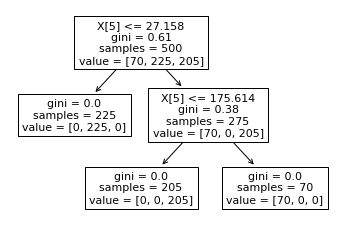

In [22]:
test_info_df = pd.read_csv('operative_information.csv')
import collections


X = train_df.iloc[:,1:]
y = train_df.iloc[:,0]

clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_tree(clf)

collections.Counter(clf.predict(test_info_df))
clf.feature_importances_

In [18]:
clf_rf = RandomForestClassifier()
parametres = {'n_estimators' : [i for i in range(1,11)],'max_depth' : [i for i in range(2,8)],\
              'min_samples_split' : [i for i in range(2,5)] }

best_clf_rf = GridSearchCV(clf_rf, parametres)

In [19]:
best_clf_rf.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [20]:
test_info_df = pd.read_csv('operative_information.csv')
best_clf_rf.best_estimator_.predict(test_info_df)


array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [21]:
collections.Counter(best_clf_rf.best_estimator_.predict(test_info_df))

Counter({'fighter': 675, 'transport': 595, 'cruiser': 230})